# **TikTok Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Tableau and Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:
1. Identify any outliers:


*   What methods are best for identifying outliers?
*   How do you make the decision to keep or exclude outliers from any future models?



##### Types of outliers
Outliers can be classified by:
- Global: extreme values with no association with other values
- Contextual: outliers that may be valid, but deviate from the data distribution (example: a spike on sales)
- Collective: follow a similar pattern, but are isolated from the dataset values

##### Dealing with outliers
It's important to note that outliers may be valid or not. It'll depend on the dataset and context that we are in. Depending on the type of outlier, we may choose different strategies to deal with them:
- Delete them
- Reassign them by inputing the average or creating a floor and ceiling based on some quantile
- Leave them

##### Identifying outliers
The best method to identify outliers is to check if the outlier have a value smaller than 1.5 * First_Quantile or bigger than 1.5 * Third_Quantile.

### **Task 1. Imports, links, and loading**
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps.

Link to supporting materials:
Public Tableau: https://public.tableau.com/s/. Note that the TikTok dataset can be downloaded directly from this notebook by going to "Lab Files" in the menu bar at the top of the page, clicking into the "/home/jovyan/work" folder, selecting `tiktok_dataset.csv`, and clicking "Download" above the list of files. 

For EDA of the data, import the packages that would be most helpful, such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.


In [2]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import numpy as np
import pandas as pd

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.


In [3]:
# Load dataset into dataframe
data = pd.read_csv("../data/tiktok_dataset.csv")

| **Column name** | **Type** | **Description** |
| --- | --- | --- |
| # | int | TikTok assigned number for video with claim/opinion. |
| claim_status | obj | Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from an unverified source. |
| video_id | int | Random identifying number assigned to video upon publication on TikTok. |
| video_duration_sec | int | How long the published video is measured in seconds. |
| video_transcription_text | obj | Transcribed text of the words spoken in the published video. |
| verified_status | obj | Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.” |
| author_ban_status | obj | Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned.” |
| video_view_count | float | The total number of times the published video has been viewed. |
| video_like_count | float | The total number of times the published video has been liked by other users. |
| video_share_count | float | The total number of times the published video has been shared by other users. |
| video_download_count | float | The total number of times the published video has been downloaded by other users. |
| video_comment_count | float | The total number of comments on the published video. |

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

### **Task 2a: Data exploration and cleaning**

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set.

Consider functions that help you understand and structure the data.

*    `.head()`
*    `.info()`
*    `.describe()`
*    `.groupby()`
*    `.sort_values()`

Consider the following questions as you work:

What do you do about missing data (if any)?

Are there data outliers?

In [4]:
print(data.shape)
data.dtypes

(19382, 12)


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

- **Number of rows:** 19382
- **Number of columns:** 12

#### Quantitative Variables
- **Integer columns (4):** #, vide_id, video_duration_sec
- **Float columns (5):** video_view_count, video_like_count, video_share_count, video_download_count, video_comment_count

#### Qualitative Variables
- **Object columns (4):** claim_status, video_transcription_text, verified_status, author_ban_status

In [5]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
#,19382.0,9.691500e+03,5.595246e+03,1.000000e+00,4.846250e+03,9.691500e+03,1.453675e+04,1.938200e+04
video_id,19382.0,5.627454e+09,2.536440e+09,1.234959e+09,3.430417e+09,5.618664e+09,7.843960e+09,9.999873e+09
video_duration_sec,19382.0,3.242173e+01,1.622997e+01,5.000000e+00,1.800000e+01,3.200000e+01,4.700000e+01,6.000000e+01
video_view_count,19084.0,2.547086e+05,3.228933e+05,2.000000e+01,4.942500e+03,9.954500e+03,5.043270e+05,9.998170e+05
video_like_count,19084.0,8.430464e+04,1.334205e+05,0.000000e+00,8.107500e+02,3.403500e+03,1.250200e+05,6.578300e+05
video_share_count,19084.0,1.673525e+04,3.203617e+04,0.000000e+00,1.150000e+02,7.170000e+02,1.822200e+04,2.561300e+05
video_download_count,19084.0,1.049430e+03,2.004300e+03,0.000000e+00,7.000000e+00,4.600000e+01,1.156250e+03,1.499400e+04
video_comment_count,19084.0,3.493121e+02,7.996389e+02,0.000000e+00,1.000000e+00,9.000000e+00,2.920000e+02,9.599000e+03


#### Numerical Columns - Summarized Statistics
- Video Duration (probably in seconds): 32s +/- 16s on average, 5s min, 60s max
- Video View Count: ~255k +/- 323k on average, 20 min, ~1M max, 10k 2nd quartile
- Video Like Count: ~85k +/- 133k on average, 0 min, ~658k max, 3.5k 2nd quartile
- Video Share Count: ~16k +/- 32k on average, 0 min, ~256k max, 0.7k 2nd quartile
- Video Download Count: ~1k +/- 2k on average, 0 min, ~15k max, 46 2nd quartile
- Video Comment Count: ~349 +/- 800 on averge, 0 min, ~10k max, 9 2nd quartile

#### Numerical Columns - First impressions:
- Short videos from 5 to 1 minute, averaging to 32seconds
- Diverse distribution of video count (high std) with half of all videos with less than 10k views
- Diverse distribution of like count (high std) with half of all videos with less than 3.5k likes
- Diverse distribution of share count (high std) with half of all videos with less than 1k shares
- Diverse distribution of download count (high std) with half of all videos with less than 46 downlaods
- Diverse distribution of comment count (high std) with half of all videos with less than 9 comments

### Primary Key Variables

We can safely ignore columns `#` and `video_id` as they are simple primary keys for the videos.

In [8]:
print("unique values `#`: ", data['#'].value_counts().sum())
print("unique values `video_id`: ", data['video_id'].value_counts().sum())

unique values `#`:  19382
unique values `video_id`:  19382


#### Categorical Variables - First Impressions:

- 2 types of claim_status only: either `claim` or `opinion`. The values are almost completely balanced.
- 98% of all video transcription are unique
- 2 types of verified status: either `not verified` (93.6%) or `verified` (6.39%). Very disbalanced.
- 3 types of author ban: either `active` (80.8%), `under review` (10.7%), or `banned` (8.4%). 

In [9]:
data['claim_status'].value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

In [10]:
print("Unique items percentage: ", 19012 / 19382 * 100)
print("Unique items in video transcription: ", len(data['video_transcription_text'].value_counts()))
data['video_transcription_text'].value_counts().head()

Unique items percentage:  98.09101227943454
Unique items in video transcription:  19012


a friend read  in the media a claim that badminton is the fastest ball and net sport in the world    2
someone read  in the media a claim that technicolored squirrels roam the lands of southern india     2
a colleague learned  from the media that chihuahuas have the largest brain among dogs                2
someone learned  from the media that halley’s comet won’t be seen again until 2061                   2
a friend read  in the media a claim that iceland is growing 5 centimeters per year                   2
Name: video_transcription_text, dtype: int64

In [11]:
print("Not Verified percentage: ", 18142 / (18142 + 1240) * 100)
print("Verified percentage: ", 1240 / (18142 + 1240) * 100)
data['verified_status'].value_counts()

Not Verified percentage:  93.60231142296976
Verified percentage:  6.397688577030235


not verified    18142
verified         1240
Name: verified_status, dtype: int64

In [12]:
total_author_ban = (15663 + 2080 + 1639)
print("Active percentage: ", (15663) / total_author_ban * 100)
print("Under review percentage: ", 2080 / total_author_ban * 100)
print("Banned percentage: ", 1639 / total_author_ban * 100)
data['author_ban_status'].value_counts()

Active percentage:  80.81209369518109
Under review percentage:  10.731606645341039
Banned percentage:  8.456299659477866


active          15663
under review     2080
banned           1639
Name: author_ban_status, dtype: int64

#### Missing Data

- There are 298 missing values in `video_transcription_text`. We can safely ignore those, since this column won't be necessary for our analysis.

- `claim_status`, `video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count` all have the same number of missing values. We can inspect further to see how they look like:

In [13]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [20]:
# select only rows that have missing values
print("Percentage of rows with missing values: ", 298 / data.shape[0] * 100)
data[data.isna().any(axis=1)]

Percentage of rows with missing values:  1.5375090289959756


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,19085,NaN,4380513697,39,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,19086,NaN,8352130892,60,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,19087,NaN,4443076562,25,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,19088,NaN,8328300333,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,19089,NaN,3968729520,8,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


- There are 298 rows with missing values. In those rows, the count columns are missing. The percentage of rows that those represent is 1.5%. Since those rows are missing core values necessary for our analysis, probably dropping them is a good solution.

In [160]:
data.dropna(inplace=True)

### Analysing outlier data

### **Task 2b. Assess data types**

In Tableau, staying on the data source page, double check the data types of the columns in the dataset. Refer to the dimensions and measures in Tableau.


Review the instructions linked in the previous Activity document to create the required Tableau visualization.

### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


- Line graph, bar chart, box plot, and histogram seems to be the most relevant type of plot for our analysis.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

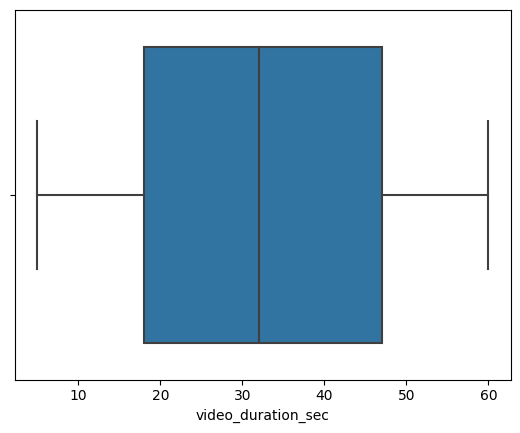

In [139]:
# Create a boxplot to visualize distribution of `video_duration_sec`
sns.boxplot(x=data['video_duration_sec']);

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

Text(0.5, 0, 'Video Duration (seconds)')

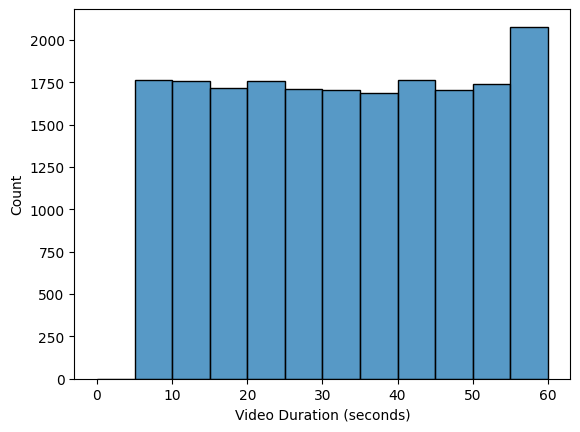

In [140]:
# Create a histogram
ax = sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
ax.set_xlabel('Video Duration (seconds)')

**Question:** What do you notice about the duration and distribution of the videos?

- It looks like there is no outliers and half of the videos have 32seconds.

- The histogram of video duration is uniform.

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

Text(0.5, 0, 'Video View Count')

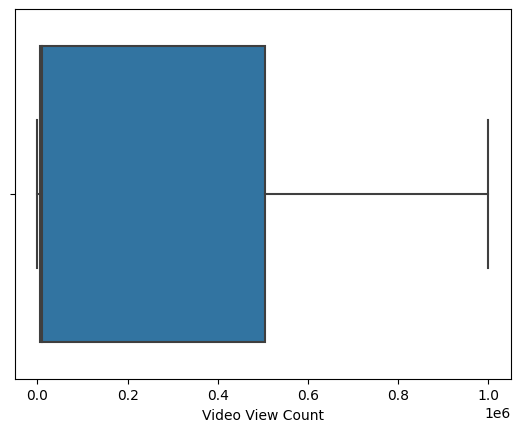

In [141]:
# Create a boxplot to visualize distribution of `video_view_count`
ax = sns.boxplot(x=data['video_view_count']);
ax.set_xlabel('Video View Count')

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

Text(0.5, 0, 'Video View Count')

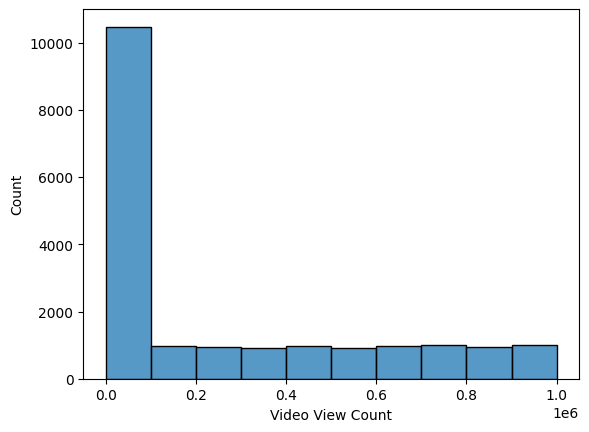

In [142]:
# Create a histogram
ax = sns.histplot(data['video_view_count'], bins=range(0,(10**6+1),10**5))
ax.set_xlabel('Video View Count')

**Question:** What do you notice about the distribution of this variable?

- It looks like there is no outliers
- Histogram shows a highly right skewed data
- The majority of views count is smaller than 100k views

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

Text(0.5, 0, 'Video Like Count')

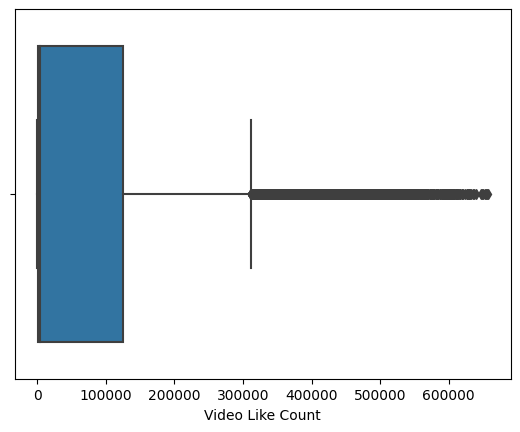

In [144]:
# Create a boxplot to visualize distribution of `video_like_count`
ax = sns.boxplot(x=data['video_like_count'])
ax.set_xlabel('Video Like Count')

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

Text(0.5, 0, 'Video Like Count')

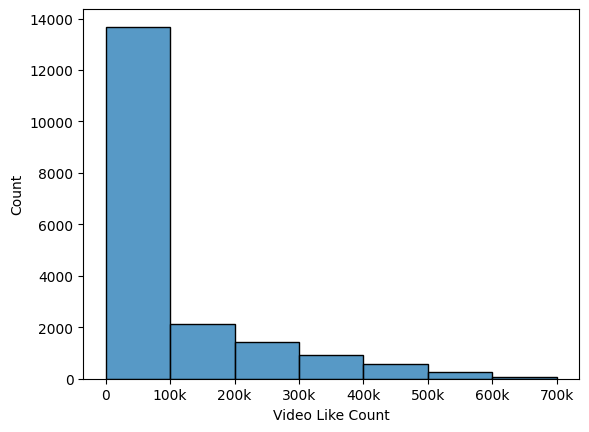

In [145]:
# Create a histogram
ax = sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
ax.set_xlabel('Video Like Count')

**Question:** What do you notice about the distribution of this variable?

- It seems like there is a lot of outliers
- Histogram distribution is extremely right skewed
- Majority of counts is smaller than 50k

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

Text(0.5, 0, 'Video Comment Count')

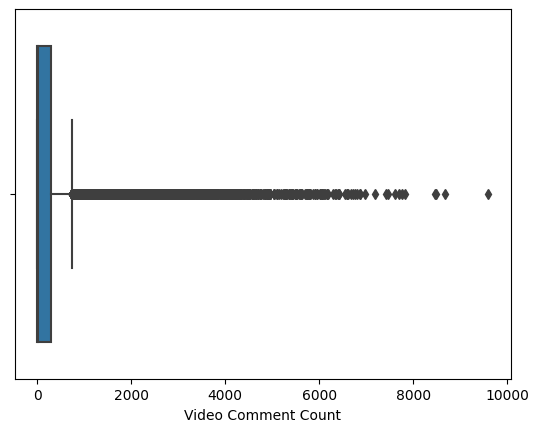

In [146]:
# Create a boxplot to visualize distribution of `video_comment_count`
ax = sns.boxplot(x=data['video_comment_count'])
ax.set_xlabel('Video Comment Count')

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

Text(0.5, 0, 'Video Comment Count')

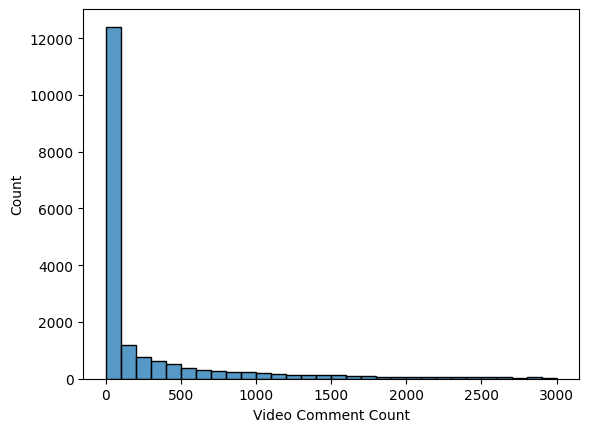

In [147]:
# Create a histogram
ax = sns.histplot(data['video_comment_count'], bins=range(0,(3001),100))
ax.set_xlabel('Video Comment Count')

**Question:** What do you notice about the distribution of this variable?

- It seems like there is a lot of outliers
- Histogram distribution is extremely right skewed
- Majority of counts is smaller than 1000

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

Text(0.5, 0, 'Video Share Count')

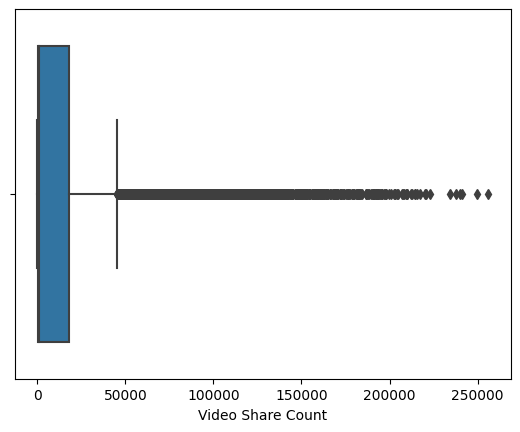

In [149]:
# Create a boxplot to visualize distribution of `video_share_count`
ax = sns.boxplot(x=data['video_share_count'])
ax.set_xlabel('Video Share Count')

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

Text(0.5, 0, 'Video Share Count')

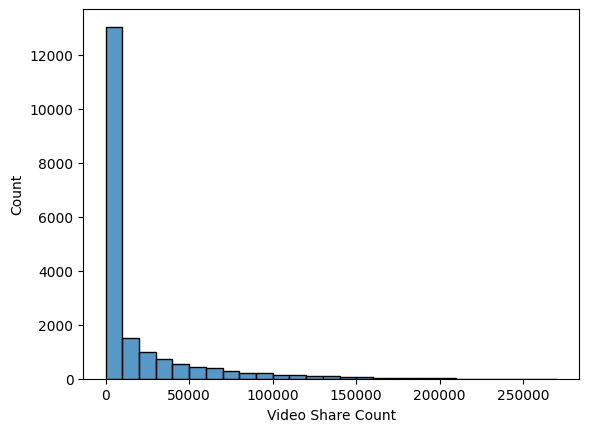

In [150]:
# Create a histogram
ax = sns.histplot(data['video_share_count'], bins=range(0,(270001),10000))
ax.set_xlabel('Video Share Count')

**Question:** What do you notice about the distribution of this variable?

- It seems like there is a lot of outliers
- Histogram distribution is extremely right skewed
- Majority of counts is smaller than 25k

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

Text(0.5, 0, 'Video Download Count')

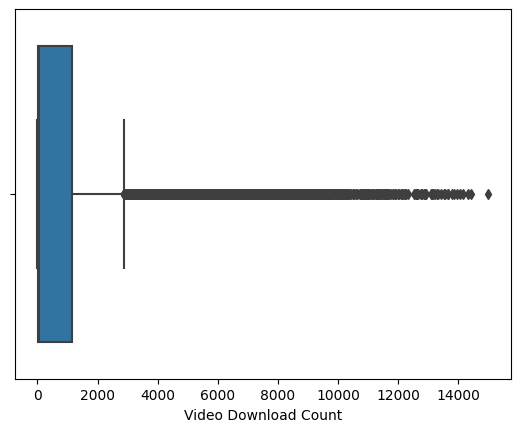

In [151]:
# Create a boxplot to visualize distribution of `video_download_count`
ax = sns.boxplot(x=data['video_download_count'])
ax.set_xlabel('Video Download Count')

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

Text(0.5, 0, 'Video Download Count')

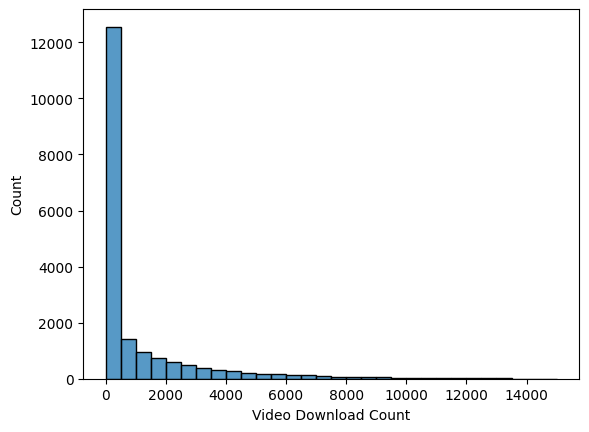

In [152]:
# Create a histogram
ax = sns.histplot(data['video_download_count'], bins=range(0,(15001),500))
ax.set_xlabel('Video Download Count')

**Question:** What do you notice about the distribution of this variable?

- It seems like there is a lot of outliers
- Histogram distribution is extremely right skewed
- Majority of counts is smaller than 1000

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

In [43]:
data['verified_status'].value_counts()

not verified    18142
verified         1240
Name: verified_status, dtype: int64

In [44]:
data['claim_status'].value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

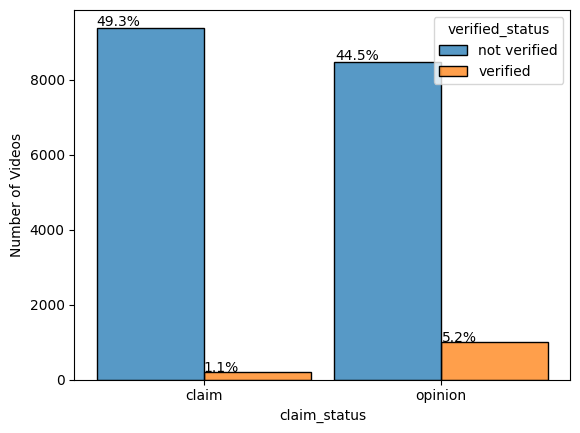

In [155]:
# Create a histogram
grouped_data = data.groupby(by=['verified_status', 'claim_status']).size()
total_users = grouped_data.sum()
ax = sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
ax.set_ylabel('Number of Videos')
# show values as labels in the histogram
for p in ax.patches:
    percentage = "{:.1f}".format(p.get_height() / total_users * 100) + "%"
    ax.annotate(percentage, (p.get_x() * 1.005, p.get_height() * 1.005))

In [65]:
print("Not verified Users: ", (9399 + 8485) / (9399 + 8485 + 209 + 991) * 100)
print("Not verified posting claims: ", (9399) / (9399 + 8485))
print("Not verified posting opinions: ", (8485) / (9399 + 8485))

Not verified Users:  93.7120100607839
Not verified posting claims:  0.5255535674345784
Not verified posting opinions:  0.4744464325654216


**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

- Verified users are more likely to post opinions
- Majority of users (93%) of all users are not verified, of which 52% post claims and 47% post opinions.

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

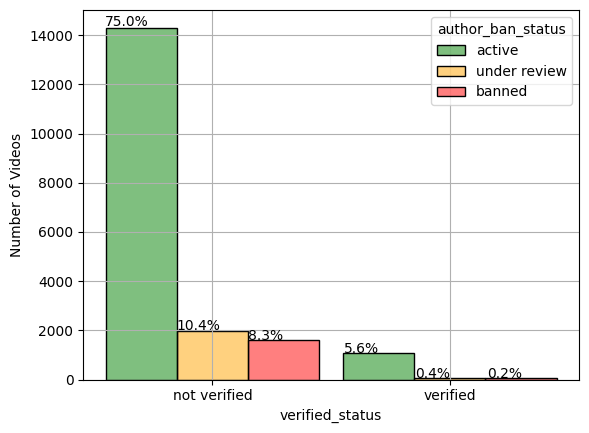

In [164]:
# Create a histogram
grouped_data = data.groupby(by=['verified_status', 'author_ban_status']).size()
total_users = grouped_data.sum()
ax = sns.histplot(data, x='verified_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
ax.grid()
ax.set_ylabel('Number of Videos')
# show values as labels in the histogram
for p in ax.patches:
    # str format to 2 digits
    percentage = "{:.1f}".format(p.get_height() / total_users * 100) + "%"
    ax.annotate(percentage, (p.get_x() * 1.005, p.get_height() * 1.005))

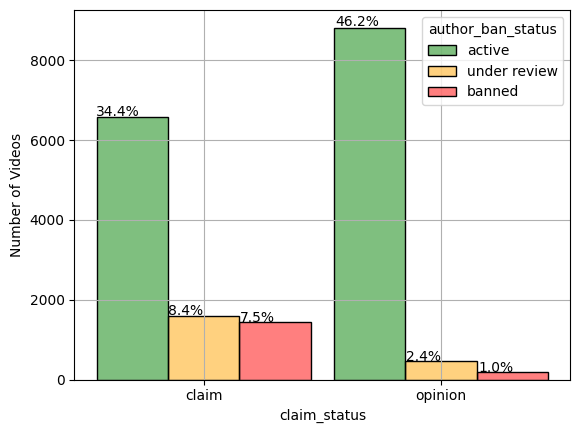

In [165]:
# Create a histogram
grouped_data = data.groupby(by=['claim_status', 'author_ban_status']).size()
total_users = grouped_data.sum()
ax = sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
ax.grid()
ax.set_ylabel('Number of Videos')
# show values as labels in the histogram
for p in ax.patches:
    # str format to 2 digits
    percentage = "{:.1f}".format(p.get_height() / total_users * 100) + "%"
    ax.annotate(percentage, (p.get_x() * 1.005, p.get_height() * 1.005))

**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

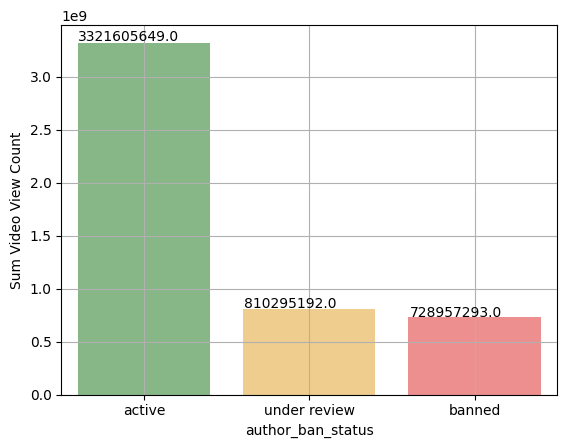

In [168]:
# Create a bar plot
# Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.
grouped_data = data.groupby(by=['author_ban_status']).sum(numeric_only=True).reset_index()

ax = sns.barplot(data=grouped_data,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
ax.grid()
ax.set_ylabel('Sum Video View Count')
# show values as labels in the histogram
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

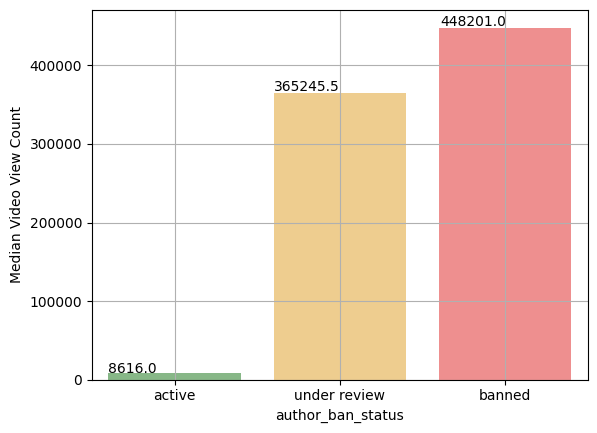

In [169]:
# Create a bar plot
# Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.
grouped_data = data.groupby(by=['author_ban_status']).median(numeric_only=True).reset_index()

ax = sns.barplot(data=grouped_data,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
ax.grid()
ax.set_ylabel('Median Video View Count')
# show values as labels in the histogram
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [123]:
(448201 + 365245) / (448201 + 365245 + 8616)

0.9895190387099756

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

- View count for banned and under review users is 52x bigger than the median view count of active users.
- Based on the second plot below, claims have a considerable higher median video count, possibly correlated with the bigger median view count of banned and under review users.
- This suggest that view count may be a good indicator of claim status.

In [172]:
grouped_data

,claim_status,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,4804.5,5.607672e+09,32.0,501555.0,123649.0,17997.5,1139.5,286.0
1,opinion,14346.5,5.611857e+09,32.0,4953.0,823.0,121.0,7.0,1.0


In [177]:
grouped_data

,claim_status,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,4804.5,5.607672e+09,32.0,501555.0,123649.0,17997.5,1139.5,286.0
1,opinion,14346.5,5.611857e+09,32.0,4953.0,823.0,121.0,7.0,1.0


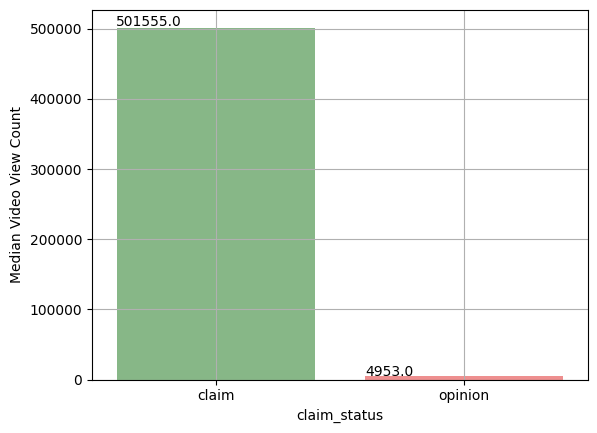

In [179]:
# Calculate the median view count for claim status.
grouped_data = data.groupby(by=['claim_status']).median(numeric_only=True).reset_index()

ax = sns.barplot(data=grouped_data,
            x='claim_status',
            y='video_view_count',
            order=['claim', 'opinion'],
            palette={'claim':'green', 'opinion':'red'},
            alpha=0.5)
ax.grid()
ax.set_ylabel('Median Video View Count')
# show values as labels in the histogram
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

In [127]:
4.813891e+09 / (4.813891e+09 + 4.696715e+07)

0.9903376834808479

In [126]:
grouped_data

claim_status
claim      4.813891e+09
opinion    4.696715e+07
Name: video_view_count, dtype: float64

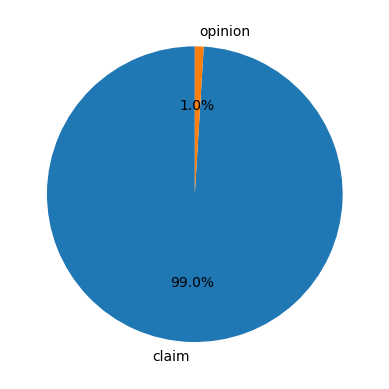

In [184]:
# Create a pie graph
### Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.
grouped_data = data.groupby(by=['claim_status'])['video_view_count'].sum()
ax = plt.pie(grouped_data, labels=['claim', 'opinion'], autopct='%1.1f%%', startangle=90)

**Question:** What do you notice about the overall view count for claim status?

- 99% of all views are coming from videos labeled as claim. This suggests an extreme disbalance for this specific variable (view count).

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [134]:
### YOUR CODE HERE ###
count_columns = ['video_view_count', 'video_like_count', 'video_comment_count', 'video_share_count', 'video_download_count']

for column in count_columns:
    median_value = data[column].median()
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    high_irq_threshold = median_value + 1.5 * iqr
    low_irq_threshold = median_value - 1.5 * iqr
    count_videos_outliers = data[(data[column] > high_irq_threshold) | (data[column] < low_irq_threshold)].shape[0]
    # count_videos_outliers = data[(data[column] <= high_irq_threshold) & (data[column] >= low_irq_threshold)].shape[0]
    percentage = "{:.2f}".format(count_videos_outliers / data.shape[0] * 100)
    print(f"Number of outliers for column {column}: {count_videos_outliers} / ", data.shape[0], f"({percentage}%)")

Number of outliers for column video_view_count: 2343 /  19382 (12.09%)
Number of outliers for column video_like_count: 3468 /  19382 (17.89%)
Number of outliers for column video_comment_count: 3882 /  19382 (20.03%)
Number of outliers for column video_share_count: 3732 /  19382 (19.25%)
Number of outliers for column video_download_count: 3733 /  19382 (19.26%)


#### **Scatterplot**

Text(0.5, 1.0, 'Claim Videos')

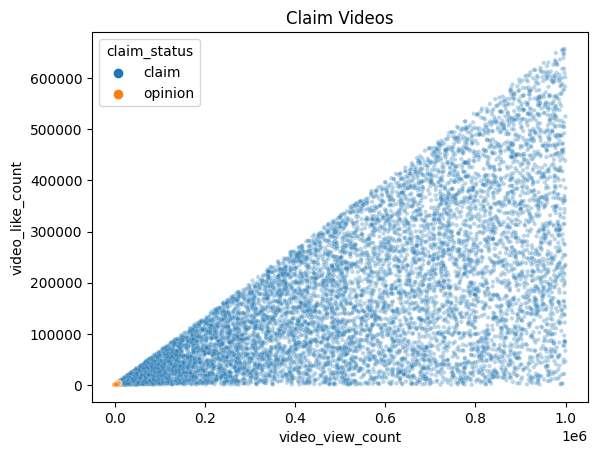

In [187]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
ax = sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
ax.set_title('Claim Videos')

Text(0.5, 1.0, 'Opinion Videos')

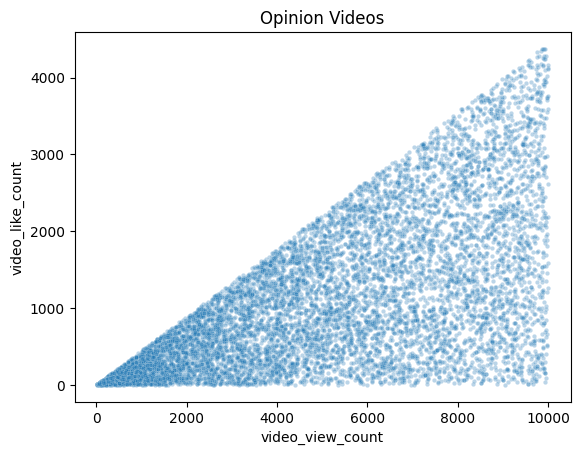

In [189]:
opinion = data[data['claim_status']=='opinion']
ax = sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
ax.set_title('Opinion Videos')

You can do a scatterplot in Tableau Public as well, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the instructions linked in the previous Activity page.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

---

- The proption of claim and opinion videos is similar, but claim videos receive much more video views, shares, download, likes and comments

- A considerable amount of banned and under review videos are associated with claim videos. Not verified users tend to post more claim videos, while verified users post more opinion videos.

- On average, claim videos are much more popular than opinion videos. Claim videos are much more regardless than opinion videos regardless if the user is verified or not, active, banned, or under review. But because verified users prefer opinion videos, not verified users receive much more attention on their videos on average.

---

**Action:** Review and adjust the algorithm's preference for "claim" content.

**Why:** To avoid bias and to promote greater diversity of content and opinions, while also reducing the risk of being manipulated by malicious actors.

---

**Action:** Develop methods to promote and increase engagement for "opinion" videos. Consider experimental designs such as different presentation methods.

**Why:** To encourage more balanced content creation and avoid disproportionate content categorization.

---

**Action:** Perform a detailed analysis of content and trending topics that are associated with "claim" content and banned/under-review accounts.

**Why:** To better understand what drives high engagement and to help inform future content strategies.

---

**Action:** Prioritize verified creators' "opinion" content in "For You" feeds and explore page algorithms, and provide access to advanced, exclusive filters, to enhance their visibility and engagement.

**Why:** By prioritizing their content, the platform gives verified users a clear competitive advantage and tangible value to being verified. This motivates them to create more "opinion" content and stay active on the platform.

---

These recommendations aim to:

- **Reduce Content Imbalance:** By addressing the dominance of claim videos.
- **Improve Platform Integrity:** By optimizing verification and moderation processes.
- **Promote Diverse Content:** By encouraging more opinion videos and content from various types of accounts.